# Hands on: Visualización y Clustering
## Minería de Datos 2021

### 1.- Selección y Descripción de Datos  

**1.1**- Descargue los 4 csv del aula virtual (mismo lugar donde encontró este archivo). Cada CSV contiene una lista de reproducción de canciones de spotify:
* Dinner: canciones para cenar o para poner en un restaurant
* Sleep: canciones que promueven el sueño
* Party: canciones ideales para el baile
* Workout: canciones para hacer ejercicio

Cada canción tiene un hash único para identificarla en spotify (id), un nombre y el artista correspondiente. El resto de las features (características) las puede ver directamente de la [página de desarrolladores de spotify](https://developer.spotify.com/documentation/web-api/reference/tracks/get-audio-features/)


**PREGUNTA**: Escriba aquí una tabla markdown con una explicación corta de cada feature.

* *id*: id del track
* *name*: nombre del track
* *mfcc*: Promedio de los Coeﬁcientes Cepstrales en las Frecuencias de Mel
* *scem*: Centroide espectral
* *scom*: Contraste espectral
* *srom*: Roll-off espectral
* *sbwm*: Ancho de banda espectral.
* *tempo*: Tempo estimado de la canción
* *rmse*: Media de la raíz del error cuadrático medio


**1.2**- Cargue cada playlist en un DataFrame pandas. Agregue una columna indicando al **playlist** que pertenece. Concatene todas las playlist en un solo dataframe. Verifique que su dataset tenga sentido.

**RECUERDE:**
* Elimine todos los samples (muestras) que tengan valores NaN (o impútelos si es valiente)
* Verifique que los índices del nuevo DataFrame estén correctos
* Imprima las estadísticas básicas de su dataset (media, varianza, máximos y mínimos) y su cabecera y cola para verificar el contenido

In [1]:
import pandas
#Cargar los datos a DataFrames
table_party = pandas.read_csv("party_audio.csv")
table_sleep = pandas.read_csv("sleep_audio.csv")
table_dinner = pandas.read_csv("dinner_audio.csv")
table_workout = pandas.read_csv("workout_audio.csv")

In [5]:
#Agregar la columna "playlist"
table_party["playlist"] = "party"
table_sleep["playlist"] = "sleep"
table_dinner["playlist"] = "dinner"
table_workout["playlist"] = "workout"
#Concatenar los DataFrame
table_all = pandas.concat([table_party, table_sleep, table_dinner, table_workout], ignore_index=True)

In [6]:
table_all

,id,name,mfcc,scem,scom,srom,sbwm,tempo,rmse,playlist
0,1,Aint My Fault.mp3,7.544702,2911.298160,19.847451,6540.168786,2904.537881,143.554688,8.705166,party
1,2,Alarm.mp3,6.000209,2423.260228,21.042379,5360.700918,2587.063482,143.554688,8.930219,party
2,3,Be As You Are - JordanXL Remix.mp3,6.259538,3215.164648,20.225918,6710.342757,2914.723038,172.265625,6.885521,party
3,4,Blow Your Mind (Mwah).mp3,7.872813,2670.846380,19.770658,5995.880410,2784.231148,107.666016,9.023844,party
4,5,Body Say.mp3,8.349560,2377.378428,20.028248,5226.343397,2594.219522,172.265625,9.701954,party
...,...,...,...,...,...,...,...,...,...,...
169,45,Wild for the Night.mp3,7.909813,2918.005158,19.835924,6597.643438,2891.844519,143.554688,11.055170,workout
170,46,'Till I Collapse.mp3,7.283616,2674.774992,19.876952,5288.601354,2482.279420,86.132812,8.857639,workout
171,47,A Milli.mp3,0.319868,2984.144801,21.843218,6185.670929,2719.480050,103.359375,7.212768,workout
172,48,All The Way Up (Remix).mp3,-1.639083,2541.987379,21.938482,5268.393143,2485.670784,117.453835,5.651819,workout


In [7]:
#Eliminar muestras con datos faltantes
table_all = table_all.dropna(axis=0)
table_all

,id,name,mfcc,scem,scom,srom,sbwm,tempo,rmse,playlist
0,1,Aint My Fault.mp3,7.544702,2911.298160,19.847451,6540.168786,2904.537881,143.554688,8.705166,party
1,2,Alarm.mp3,6.000209,2423.260228,21.042379,5360.700918,2587.063482,143.554688,8.930219,party
2,3,Be As You Are - JordanXL Remix.mp3,6.259538,3215.164648,20.225918,6710.342757,2914.723038,172.265625,6.885521,party
3,4,Blow Your Mind (Mwah).mp3,7.872813,2670.846380,19.770658,5995.880410,2784.231148,107.666016,9.023844,party
4,5,Body Say.mp3,8.349560,2377.378428,20.028248,5226.343397,2594.219522,172.265625,9.701954,party
...,...,...,...,...,...,...,...,...,...,...
169,45,Wild for the Night.mp3,7.909813,2918.005158,19.835924,6597.643438,2891.844519,143.554688,11.055170,workout
170,46,'Till I Collapse.mp3,7.283616,2674.774992,19.876952,5288.601354,2482.279420,86.132812,8.857639,workout
171,47,A Milli.mp3,0.319868,2984.144801,21.843218,6185.670929,2719.480050,103.359375,7.212768,workout
172,48,All The Way Up (Remix).mp3,-1.639083,2541.987379,21.938482,5268.393143,2485.670784,117.453835,5.651819,workout


**PREGUNTA**: Si aprendieramos automáticamente la variable **playlist**, ¿qué problema de la vida real estariamos resolviendo? ¿Cree usted que será posible deducir esta variable a partir de los otros datos numéricos (hipótesis)?

**RESPUESTA**: El problema que estariamos resolviendo sería como clasificar una canción de forma automática en esas 4 categorías. La hipótesis es que las características sonoras en cada playlist debiesen ser comunes e identificables respecto a otras, por lo que si se debería poder.

### 2- Reducción de Dimensionalidad y Visualización

**2.1**- Compute la matriz de correlaciones del DataFrame (sólo valores numéricos) y presentela gráficamente como un mapa de calor. Haga una selección de 5 características que le parezcan interesantes y presente su matriz de correlación en el mismo formato.

In [8]:
#Funcion parar mostrar la matriz de correlaciones en un mapa de calor
import seaborn as sns
import matplotlib.pyplot as plt
def plot_corr_matrix(data,features=None,annot=True,s=(12,8)):
    fig= plt.figure(figsize=s)
    ax= fig.add_subplot(111)
    if features is None:
        corr = data.corr()
    else:
        corr = data[features].corr()
    ax= sns.heatmap(corr,annot=annot,
        xticklabels=corr.columns,
    yticklabels=corr.columns, cmap="seismic",vmin=-1,vmax=1)
    plt.title("Correlation Matrix", fontsize = 15)
    plt.show()

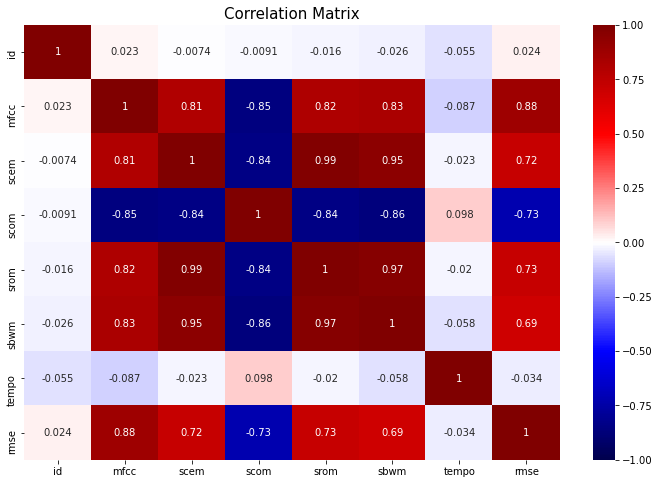

In [9]:
plot_corr_matrix(table_all)

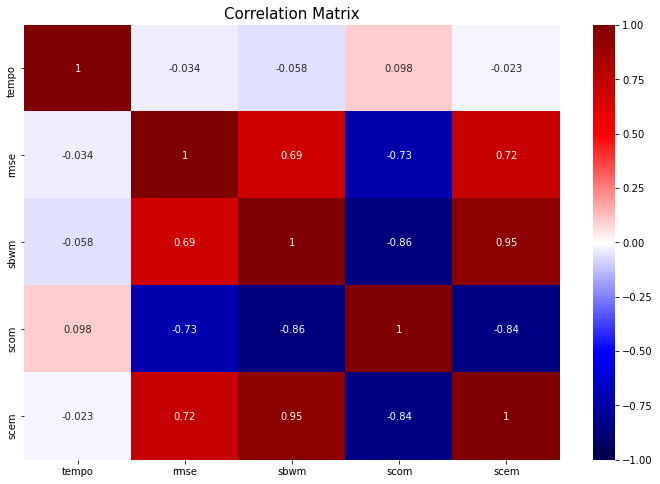

In [10]:
# ponga aquí su código
feat_selected = [ 'tempo', 'rmse', 'sbwm', 'scom', 'scem']
plot_corr_matrix(table_all, features=feat_selected)

**PREGUNTA**: Al hacer la selección usted aprendió algo de los datos (patrón, tendencia, repetición, etc.). Explique brevemente lo que usted conjetura o cree respecto a los datos.

**RESPUESTA**: Que el tempo no está correlacionado con las otras variables, por lo que tiene información distinta que el resto de las características. Por otro lado, todas las otras características están fuertemente correlacionadas, salvo el contraste de la señal que está inversamente correlacionada en buena medida. Esto quiere decir que probablemente con 2 o 3 características apropiadas ya se dispone de bastante información.

**2.2**- Utilice seaborn para gráficar las proyecciones 2D de los datos en estas 5 dimensiones. Agregue la variable playlist como descriptor de color de los puntos.

In [11]:
# ponga aquí su código
table_all.describe()

,id,mfcc,scem,scom,srom,sbwm,tempo,rmse
count,174.000000,174.000000,174.000000,174.000000,174.000000,174.000000,174.000000,174.000000
mean,22.459770,0.698707,1982.234210,21.965187,4153.426330,2068.710875,119.571767,5.454401
std,12.939883,7.123575,929.201670,2.232327,2119.454950,857.106015,22.686329,2.983714
min,1.000000,-22.017408,384.562343,18.022377,514.421889,347.516137,73.828125,0.294704
25%,11.250000,-4.341180,1028.984269,20.229621,1875.465743,1361.972262,100.377855,2.833731
50%,22.000000,2.136366,2297.576761,21.452406,4833.558272,2439.247496,117.453835,5.044341
75%,33.000000,6.998290,2755.173538,23.667912,5874.937392,2694.117485,135.999178,8.290623
max,49.000000,10.100636,3530.670968,27.253600,7567.962571,3132.485393,172.265625,11.168152


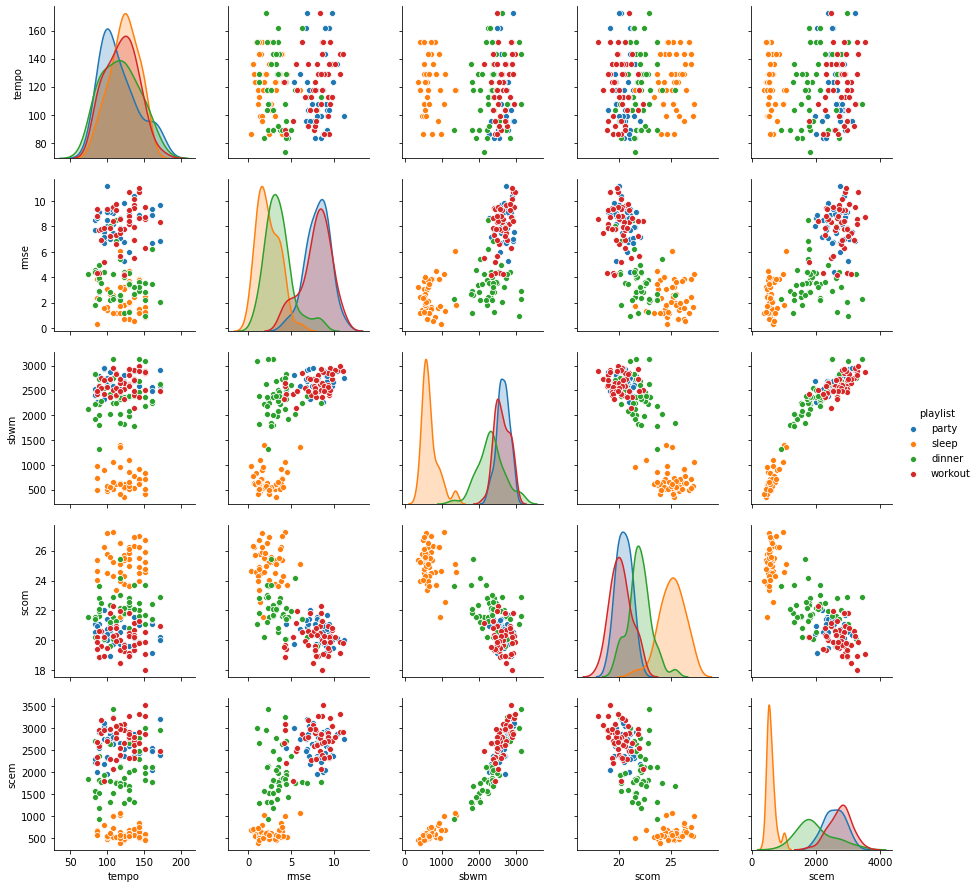

In [9]:
sns.pairplot(table_all, vars=feat_selected, hue="playlist")

**PREGUNTA**: ¿Puede sacar alguna conclusión ya de los datos seleccionados?

**RESPUESTA**: El tempo parece no ser un buen predictor de la Playlist, pero el resto si. Podemos ver en las proyecciones 2D claras separaciones, sobretodo para sleep y dinner. Workout y party están bastante más mezcladas.

**2.3**- Aplique el Análisis de Componentes Principales considerando 5 componentes. Grafique las proyecciones 2D de las 5 dimensiones PCA con la variable playlist como descriptor de color de los puntos. Además, indique cuanto de la varianza se explica con estas 5 dimensiones.

In [10]:
table_all.columns

Index(['id', 'name', 'mfcc', 'scem', 'scom', 'srom', 'sbwm', 'tempo', 'rmse',
       'playlist'],
      dtype='object')

Text(0.5, 0, 'components')

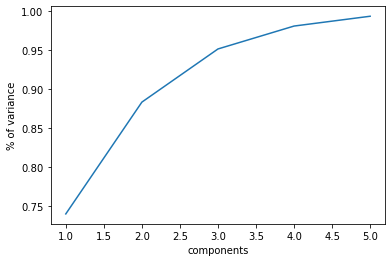

In [12]:
# ponga aquí su código
import numpy as np
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler

num_feat=['mfcc', 'scem', 'scom', 'srom', 'sbwm', 'tempo', 'rmse']

scaler = StandardScaler().fit(table_all[num_feat])
stdtab = pandas.DataFrame(scaler.transform(table_all[num_feat]))
n = 5
sklearn_pca = PCA(n_components=n,random_state=1)
xpca = sklearn_pca.fit_transform(stdtab)
varx=sklearn_pca.explained_variance_ratio_
#Grafica la varianza acumulada
plt.plot(np.arange(1,n+1),varx.cumsum())
plt.ylabel("% of variance")
plt.xlabel("components")

In [12]:
varx.sum()*100

99.38071866511848

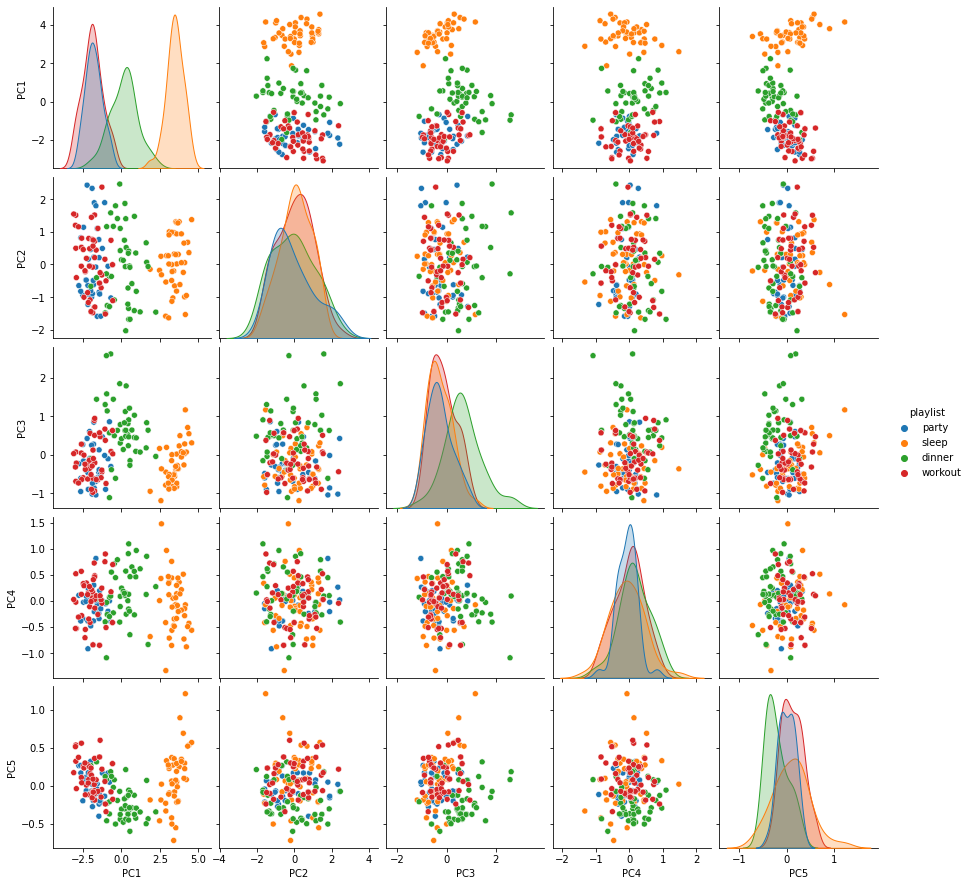

In [16]:
ind = []
for i in range(n):
    ind.append("PC"+str(i+1))
table_pca = pandas.DataFrame(xpca, columns=ind)
table_pca["playlist"] = table_all["playlist"]
sns.pairplot(table_pca, vars=ind, hue="playlist")

**PREGUNTA**: ¿Cuál representación de 5 dimensiones tiene mayor potencial para clustering según usted? Fundamente y utilice esta representación desde ahora en adelante. 

**RESPUESTA**: no existe una diferencia significativa. Sin embargo, PCA ofrece dimensiones más independientes, donde las separaciones están más alineadas con los ejes. Esto hace más facil la separación posterior.

**2.4**- Visualice la representación seleccionada con t-SNE de 2 dimensiones. Pruebe con al menos 3 valores de perplejidad.

In [14]:
from sklearn.manifold import TSNE
def plot_tsne(data, feats, label, perplxty=20):
    tsne_model = TSNE(n_components = 2, init = 'pca', perplexity=perplxty)
    tracks_tsne = tsne_model.fit_transform(data[feats])

    fig, ax = plt.subplots(figsize = (10, 10), sharex = True)
    for playlist in np.unique(data[label]):
        mask = (data[label] == playlist)
        ax.scatter(tracks_tsne[mask][:, 0], tracks_tsne[mask][:, 1], label = playlist, alpha = 0.5)
    ax.set_xlabel("t-SNE 1")
    ax.set_ylabel("t-SNE 2")
    ax.legend();

In [17]:
table_all

,id,name,mfcc,scem,scom,srom,sbwm,tempo,rmse,playlist
0,1,Aint My Fault.mp3,7.544702,2911.298160,19.847451,6540.168786,2904.537881,143.554688,8.705166,party
1,2,Alarm.mp3,6.000209,2423.260228,21.042379,5360.700918,2587.063482,143.554688,8.930219,party
2,3,Be As You Are - JordanXL Remix.mp3,6.259538,3215.164648,20.225918,6710.342757,2914.723038,172.265625,6.885521,party
3,4,Blow Your Mind (Mwah).mp3,7.872813,2670.846380,19.770658,5995.880410,2784.231148,107.666016,9.023844,party
4,5,Body Say.mp3,8.349560,2377.378428,20.028248,5226.343397,2594.219522,172.265625,9.701954,party
...,...,...,...,...,...,...,...,...,...,...
169,45,Wild for the Night.mp3,7.909813,2918.005158,19.835924,6597.643438,2891.844519,143.554688,11.055170,workout
170,46,'Till I Collapse.mp3,7.283616,2674.774992,19.876952,5288.601354,2482.279420,86.132812,8.857639,workout
171,47,A Milli.mp3,0.319868,2984.144801,21.843218,6185.670929,2719.480050,103.359375,7.212768,workout
172,48,All The Way Up (Remix).mp3,-1.639083,2541.987379,21.938482,5268.393143,2485.670784,117.453835,5.651819,workout


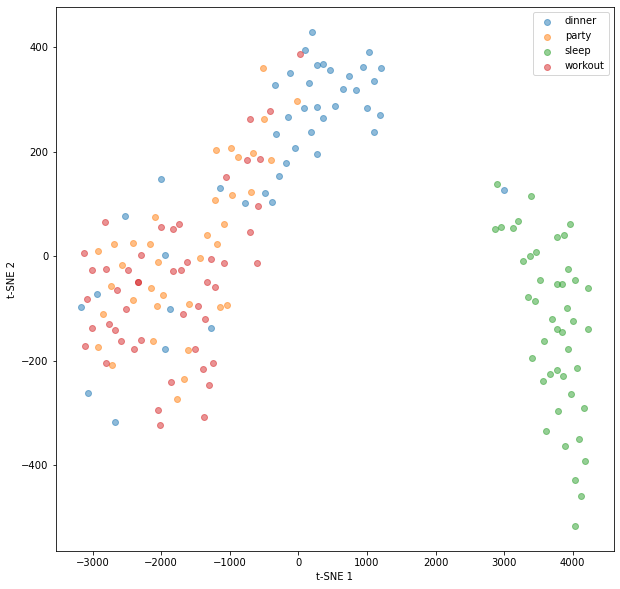

In [15]:
plot_tsne(table_all, num_feat, "playlist")

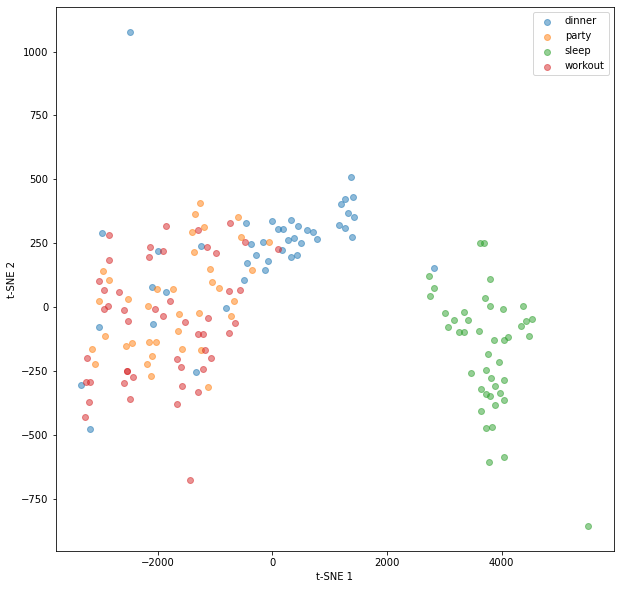

In [16]:
plot_tsne(table_all, num_feat, "playlist", 10)

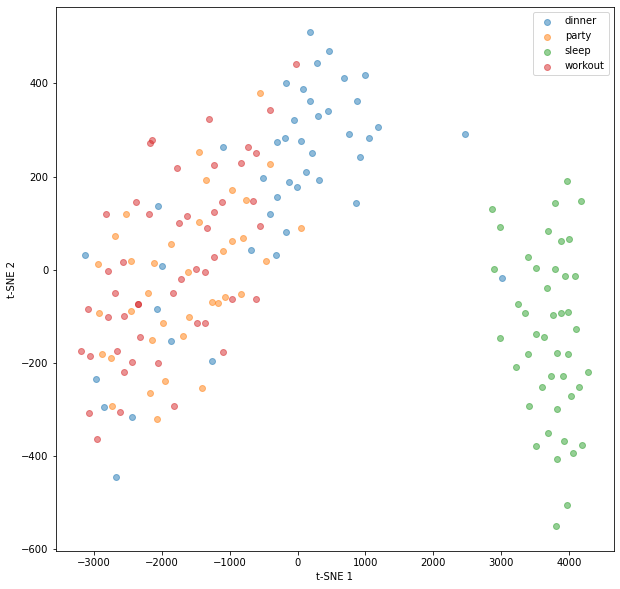

In [17]:
plot_tsne(table_all, num_feat, "playlist", 30)

**PREGUNTA**: ¿Considera usted que t-SNE ayuda en este caso? Indique cual es el efecto del parámetro perplejidad.

**PREGUNTA**: Si, podemos ver una clara separación de sleep, una razonable separación de dinner de las playlist party y workout, las cuales son difíciles de separar. El efecto de la perplejidad es condensar o dispersar los clusters a medida que baja o sube respectivamente.

### 3- Clustering 
**3.1** Aplique al menos dos algoritmos de clustering. Si el algoritmo lo requiere, fije la cantidad de clusters a 4 (cantidad real de playlist). 

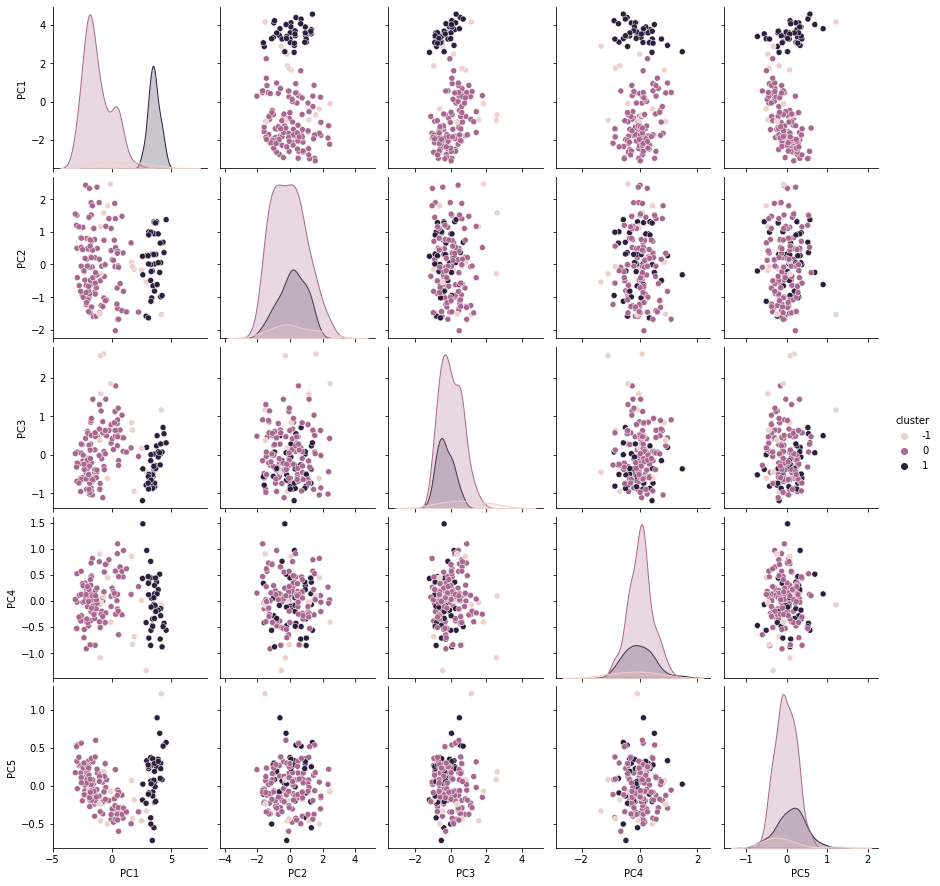

In [20]:
from sklearn.cluster import KMeans, DBSCAN
db = DBSCAN(1.1).fit(table_pca[ind])  
table_pca['cluster']=db.labels_
#table_pca
sns.pairplot(table_pca,vars=ind, hue="cluster")

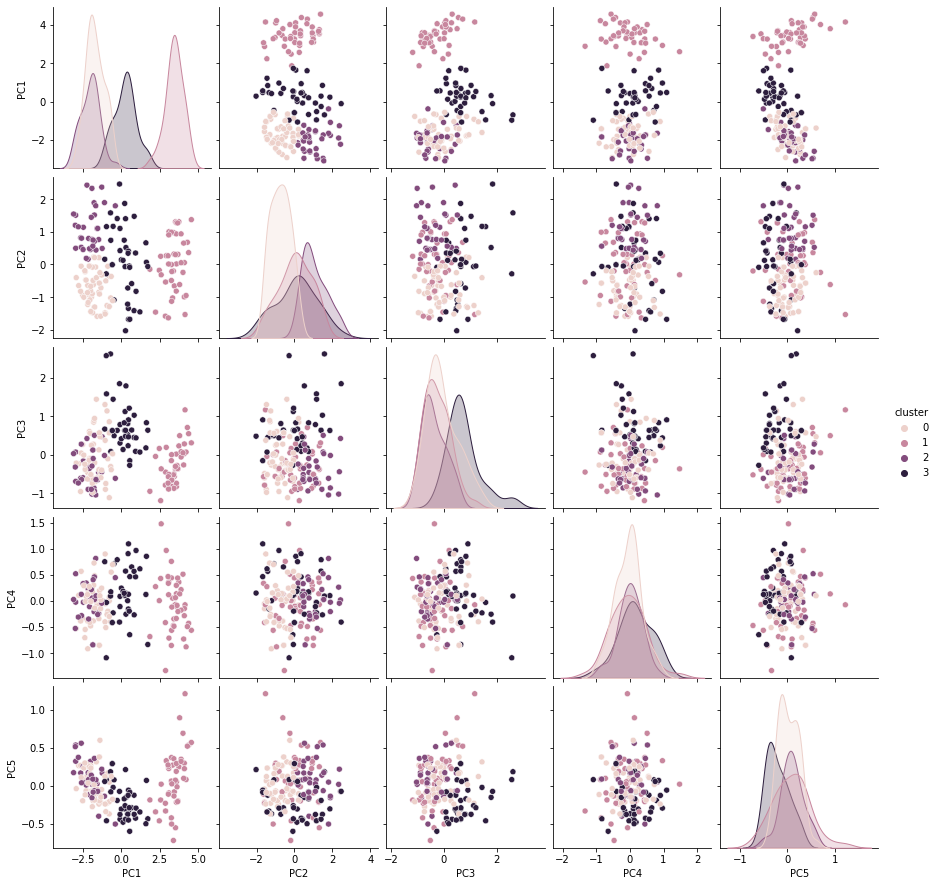

In [21]:
#Kmeans
km = KMeans(4).fit(table_pca[ind]) 
table_pca['cluster']=km.labels_
table_km = table_pca.copy()
sns.pairplot(table_pca,vars=ind, hue="cluster")

**PREGUNTA**: ¿Qué algoritmo se parece más adecuado cualitativamente? Seleccione este algoritmo para la siguiente pregunta. Tenga presente que comparar cuantitativamente clusters es complejo (muy posible!, pero aún no lo hemos visto).

**PREGUNTA**: K-means, ya que si bien DBSCAN identifica bien la playlist sleep, no lo hace muy bien para dinner. Por otro lado, la separación de party y workout es claramente artificial, pero eso es porque forzamos el parámetro a 4.


**3.2** Revise cuales son y cambie fundadamente el/los parámetros del algoritmo.

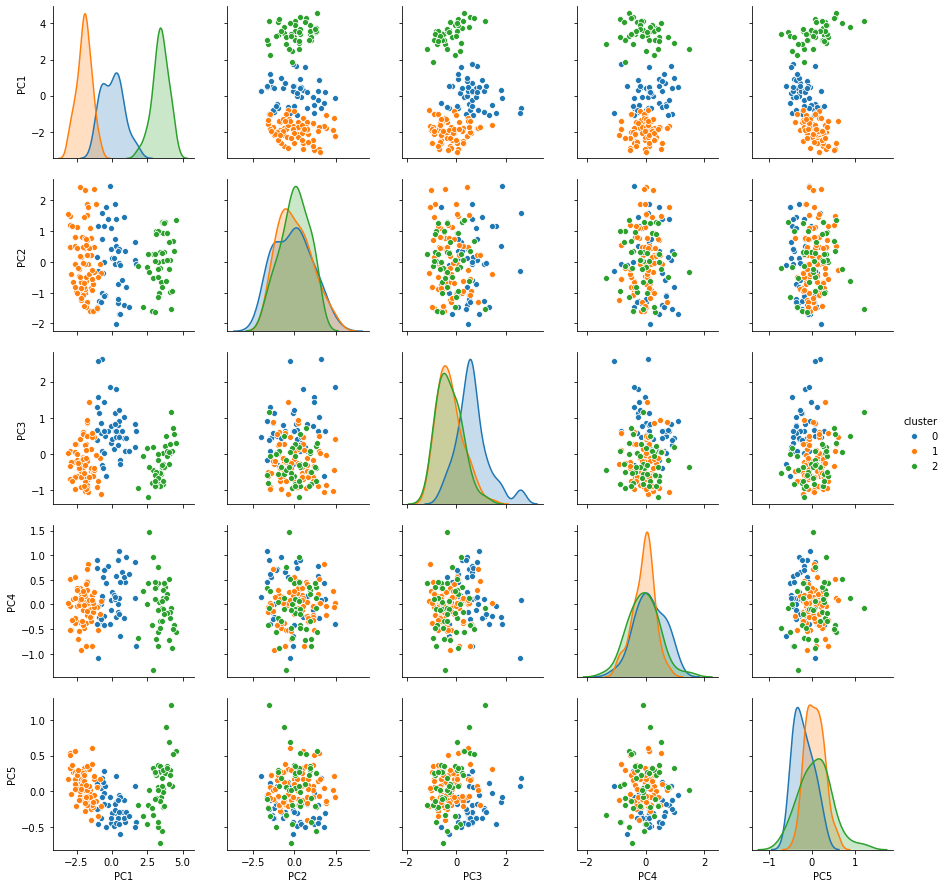

In [20]:
km = KMeans(3).fit(table_pca[ind]) 
table_pca['cluster']=km.labels_
sns.pairplot(table_pca,vars=ind, hue="cluster")

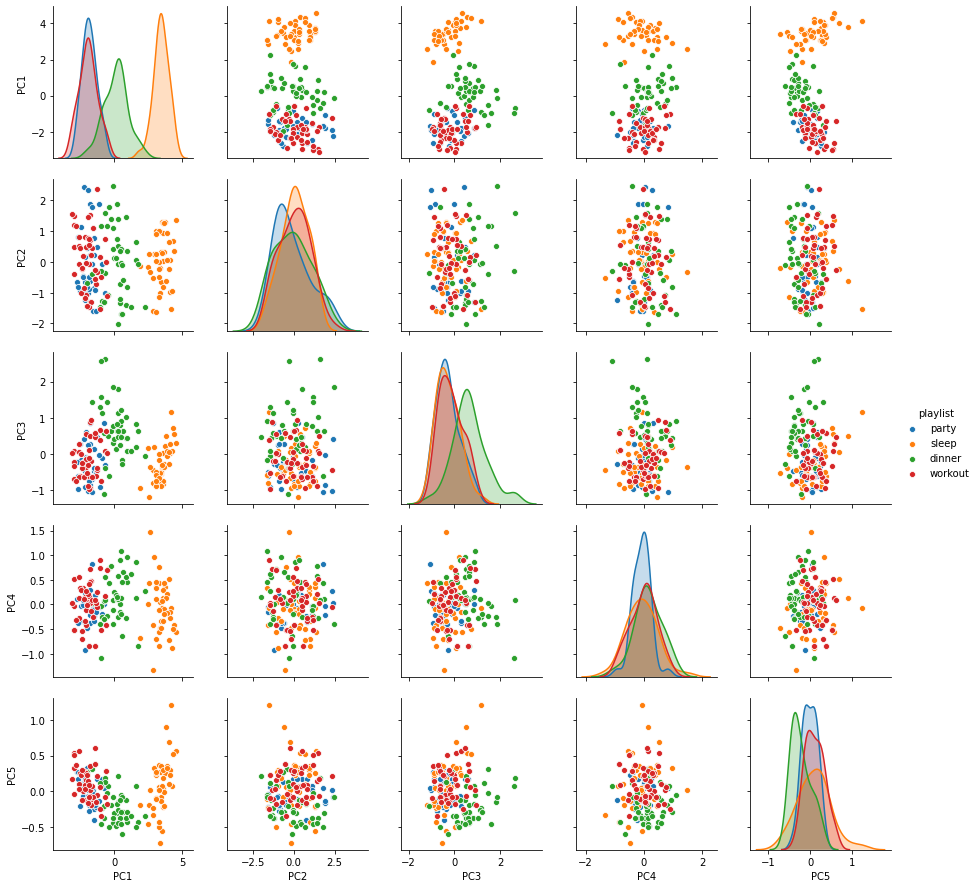

In [21]:
ind = []
for i in range(n):
    ind.append("PC"+str(i+1))
table_pca = pandas.DataFrame(xpca, columns=ind)
table_pca["playlist"] = table_all["playlist"]
sns.pairplot(table_pca, vars=ind, hue="playlist")

**PREGUNTA**: fundamente su elección y explique si funcionó o no.

**RESULTADO**: vemos que al pedirle 3 clusters, mejora la predicción del dinner, y no se forma la división artificial de party + workout.

**3.3** Seleccione un representante adecuado para cada cluster, y haga una tabla con los nombres de las canciones.

In [22]:
table_km["name"] = table_all["name"]
#Se tomará como representante aquella muestra con mayor PC1 de cada cluster
c0 = table_km.loc[table_km[table_km["cluster"] == 0]["PC1"].idxmax()]
c1 = table_km.loc[table_km[table_km["cluster"] == 1]["PC1"].idxmax()]
c2 = table_km.loc[table_km[table_km["cluster"] == 2]["PC1"].idxmax()]
c3 = table_km.loc[table_km[table_km["cluster"] == 3]["PC1"].idxmax()]
representantes = pandas.DataFrame({'name': [c0["name"],c1["name"],c2["name"],c3["name"]], "cluster": [0,1,2,3]})
representantes

,name,cluster
0,Stolen Moments.mp3,0
1,I Miss You.mp3,1
2,Regulate.mp3,2
3,Angel (Live).mp3,3


In [23]:
# ponga aquí su código

**PREGUNTA FINAL**: cual es su veredicto (tesis) en contraste con lo escrito en el punto 1.2. 

**RESPUESTA FINAL**: 

`La hipótesis es que las características sonoras en cada playlist debiesen ser comunes e identificables respecto a otras, por lo que si se debería poder` predecir los playlist.

La conclusión es que si se puede, aunque no para todas las clases. Si las playlist tienen caracteristicas sonoras similares (e.g., workout y party) entonces es difícil diferenciarlas.


